In [1]:
import glob
import os
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sys.path.append("../../../")

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.utils.class_weight import compute_sample_weight
from xgboost import XGBClassifier, XGBRFClassifier

from helpers.split import label_strings, tag_label_feature_split

/Users/rerobbins/opt/anaconda3/envs/tf/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
def rfcross_gradient_boost_experiment(dataset):

    # load data and separate one hot encoded labels from features,
    # transform one hot encoded labels into label strings,
    # then encode label strings

    print(f"\n\nDataset: {dataset}\n")

    df = pd.read_pickle(dataset)
    _, one_hot_labels, X = tag_label_feature_split(df)
    labels = label_strings(one_hot_labels)

    le = LabelEncoder()
    y = le.fit_transform(pd.Series.ravel(labels))

    # divide into train and test data sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=10, stratify=y
    )

    # standardize features
    sc = StandardScaler()
    X_train_std = sc.fit_transform(X_train)
    X_test_std = sc.transform(X_test)

    # calculate sample weights to deal with class imbalance

    sample_weights = compute_sample_weight(class_weight="balanced", y=y_train)

    model = XGBRFClassifier(
        use_label_encoder=False, objective="multi:softprob", eval_metric="mlogloss",
    )

    model.fit(X_train_std, y_train, sample_weight=sample_weights)

    predictions = model.predict(X_test_std)
    train_accuracy = model.score(X_train_std, y_train)
    test_accuracy = model.score(X_test_std, y_test)

    class_names = le.inverse_transform(list(model.classes_))
    print(f"Train: {train_accuracy = :f}\n")
    print(
        classification_report(
            y_train, model.predict(X_train_std), digits=4, target_names=class_names
        )
    )
    print(f"Test: {test_accuracy = :f}\n")
    print(
        classification_report(y_test, predictions, digits=4, target_names=class_names)
    )

    # generate confusion matrix and
    # display nicely with seaborn
    cm = confusion_matrix(y_test, predictions, normalize="true")
    heatmap_labels = list(le.classes_)
    plt.figure(figsize=(9, 9))
    sns.heatmap(
        cm,
        annot=True,
        fmt=".3f",
        linewidths=0.5,
        square=True,
        cmap="Blues_r",
        xticklabels=class_names,
        yticklabels=class_names,
    )
    plt.ylabel("Actual label")
    plt.xlabel("Predicted label")
    name = os.path.basename(dataset).split(".")[0]
    plt.title(f"{name} test (row normalized)")
    plt.show()

    return model



Dataset: ../../../datasets/dataset_01_mean.pickle

Train: train_accuracy = 0.489110

                 precision    recall  f1-score   support

    genre_blues     0.1998    0.4465    0.2760       374
genre_classical     0.8172    0.8072    0.8122      4221
  genre_country     0.1977    0.6728    0.3056       327
    genre_disco     0.2216    0.6817    0.3345       289
   genre_hiphop     0.5241    0.3574    0.4250      1701
     genre_jazz     0.3114    0.5842    0.4063      1241
    genre_metal     0.3443    0.7895    0.4795       665
      genre_pop     0.6396    0.1827    0.2843      4274
   genre_reggae     0.2761    0.6434    0.3864       788
     genre_rock     0.6076    0.3803    0.4678      3200

       accuracy                         0.4891     17080
      macro avg     0.4139    0.5546    0.4177     17080
   weighted avg     0.5887    0.4891    0.4854     17080

Test: test_accuracy = 0.411379

                 precision    recall  f1-score   support

    genre_blues     0.

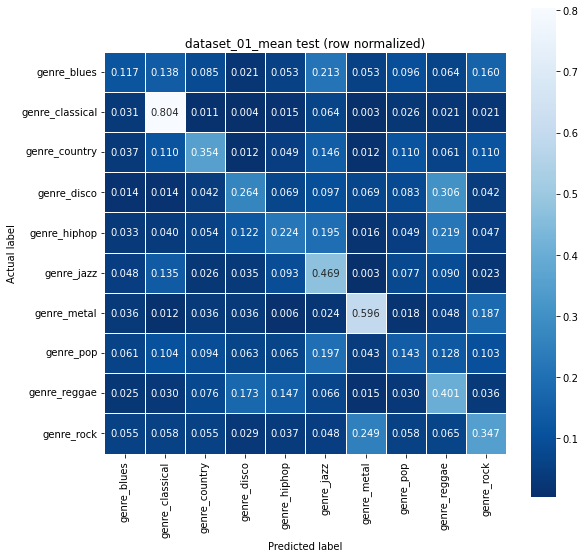



Dataset: ../../../datasets/dataset_02_mean_cov.pickle

Train: train_accuracy = 0.617272

                 precision    recall  f1-score   support

    genre_blues     0.3517    0.7005    0.4683       374
genre_classical     0.8416    0.8408    0.8412      4221
  genre_country     0.4859    0.7370    0.5857       327
    genre_disco     0.2862    0.9100    0.4354       289
   genre_hiphop     0.5774    0.6120    0.5942      1701
     genre_jazz     0.4776    0.7123    0.5718      1241
    genre_metal     0.4469    0.8602    0.5882       665
      genre_pop     0.7218    0.3229    0.4462      4274
   genre_reggae     0.5030    0.8401    0.6293       788
     genre_rock     0.6647    0.5278    0.5884      3200

       accuracy                         0.6173     17080
      macro avg     0.5357    0.7064    0.5749     17080
   weighted avg     0.6678    0.6173    0.6113     17080

Test: test_accuracy = 0.495434

                 precision    recall  f1-score   support

    genre_blues   

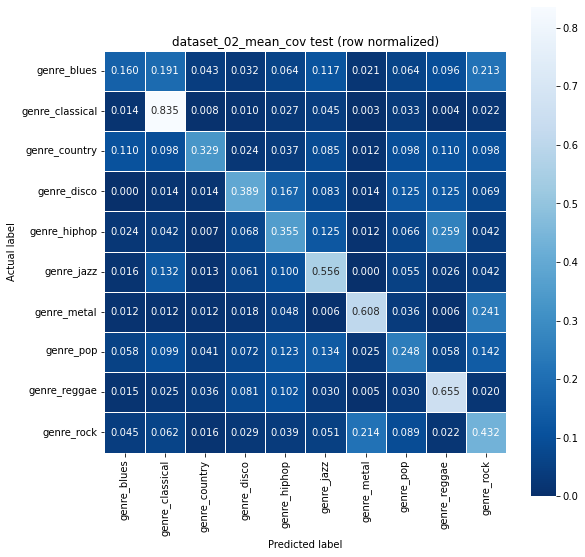



Dataset: ../../../datasets/dataset_03_mean_icov.pickle

Train: train_accuracy = 0.603981

                 precision    recall  f1-score   support

    genre_blues     0.3875    0.7139    0.5024       374
genre_classical     0.8594    0.8252    0.8419      4221
  genre_country     0.3602    0.8349    0.5032       327
    genre_disco     0.2757    0.9377    0.4261       289
   genre_hiphop     0.6262    0.5397    0.5797      1701
     genre_jazz     0.4439    0.7180    0.5486      1241
    genre_metal     0.4393    0.8271    0.5738       665
      genre_pop     0.7009    0.3453    0.4627      4274
   genre_reggae     0.4644    0.8020    0.5882       788
     genre_rock     0.6466    0.4859    0.5549      3200

       accuracy                         0.6040     17080
      macro avg     0.5204    0.7030    0.5582     17080
   weighted avg     0.6621    0.6040    0.6027     17080

Test: test_accuracy = 0.487474

                 precision    recall  f1-score   support

    genre_blues  

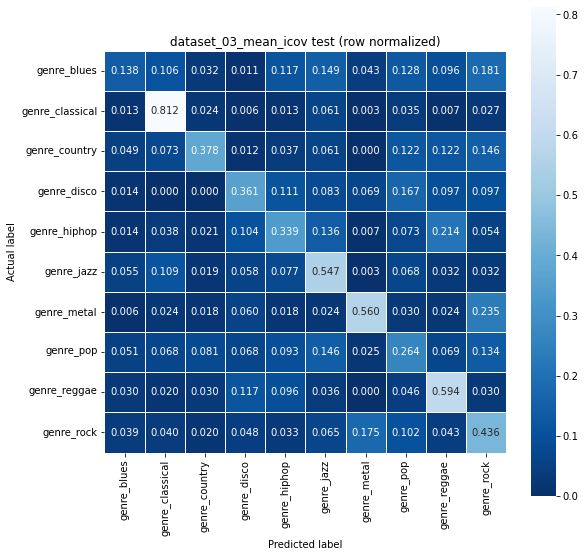



Dataset: ../../../datasets/dataset_04_mean_cov_icov.pickle

Train: train_accuracy = 0.642096

                 precision    recall  f1-score   support

    genre_blues     0.3913    0.7701    0.5189       374
genre_classical     0.8703    0.8316    0.8505      4221
  genre_country     0.4372    0.8410    0.5753       327
    genre_disco     0.3355    0.9100    0.4902       289
   genre_hiphop     0.6200    0.6608    0.6397      1701
     genre_jazz     0.4960    0.7421    0.5946      1241
    genre_metal     0.4702    0.8647    0.6091       665
      genre_pop     0.7404    0.3711    0.4944      4274
   genre_reggae     0.5300    0.8629    0.6567       788
     genre_rock     0.6764    0.5453    0.6038      3200

       accuracy                         0.6421     17080
      macro avg     0.5567    0.7400    0.6033     17080
   weighted avg     0.6902    0.6421    0.6386     17080

Test: test_accuracy = 0.513931

                 precision    recall  f1-score   support

    genre_blu

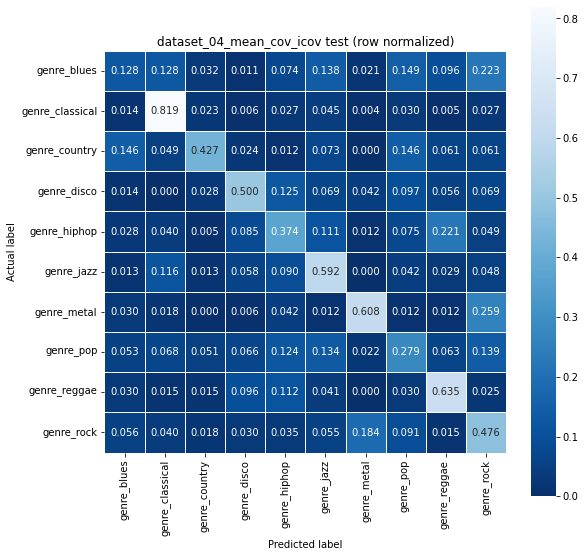



Dataset: ../../../datasets/dataset_05_pvtt.pickle

Train: train_accuracy = 0.483665

                 precision    recall  f1-score   support

    genre_blues     0.2242    0.2032    0.2132       374
genre_classical     0.8763    0.8271    0.8509      4221
  genre_country     0.1408    0.5810    0.2267       327
    genre_disco     0.2877    0.7266    0.4122       289
   genre_hiphop     0.4416    0.3310    0.3784      1701
     genre_jazz     0.3202    0.6293    0.4245      1241
    genre_metal     0.3214    0.8391    0.4648       665
      genre_pop     0.6364    0.1774    0.2774      4274
   genre_reggae     0.2625    0.7259    0.3856       788
     genre_rock     0.5716    0.3319    0.4199      3200

       accuracy                         0.4837     17080
      macro avg     0.4083    0.5372    0.4054     17080
   weighted avg     0.5872    0.4837    0.4788     17080

Test: test_accuracy = 0.424491

                 precision    recall  f1-score   support

    genre_blues     0.

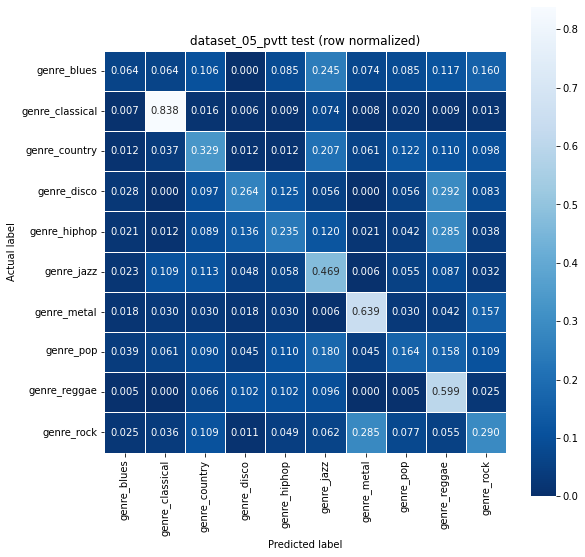



Dataset: ../../../datasets/dataset_06_pvtt_mean.pickle

Train: train_accuracy = 0.547951

                 precision    recall  f1-score   support

    genre_blues     0.2176    0.5080    0.3047       374
genre_classical     0.8857    0.8427    0.8637      4221
  genre_country     0.2892    0.6820    0.4062       327
    genre_disco     0.3539    0.7924    0.4893       289
   genre_hiphop     0.5426    0.4309    0.4803      1701
     genre_jazz     0.3664    0.6600    0.4712      1241
    genre_metal     0.3860    0.8677    0.5343       665
      genre_pop     0.6952    0.2167    0.3304      4274
   genre_reggae     0.3123    0.7982    0.4490       788
     genre_rock     0.6292    0.4612    0.5323      3200

       accuracy                         0.5480     17080
      macro avg     0.4678    0.6260    0.4861     17080
   weighted avg     0.6371    0.5480    0.5421     17080

Test: test_accuracy = 0.463826

                 precision    recall  f1-score   support

    genre_blues  

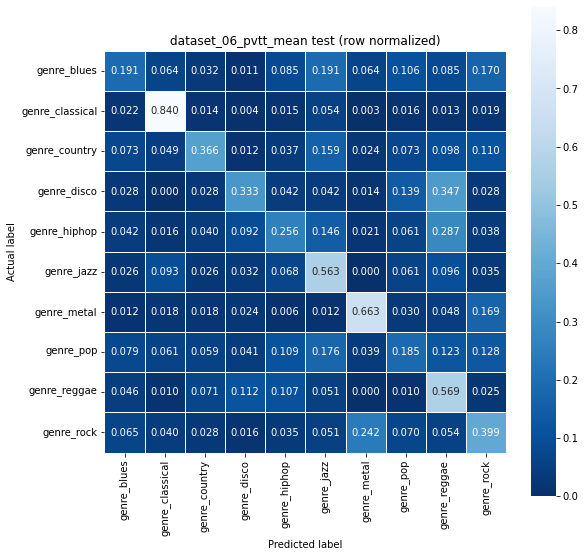



Dataset: ../../../datasets/dataset_07_pvtt_mean_cov.pickle

Train: train_accuracy = 0.624473

                 precision    recall  f1-score   support

    genre_blues     0.3264    0.7166    0.4485       374
genre_classical     0.8946    0.8427    0.8679      4221
  genre_country     0.4780    0.7309    0.5780       327
    genre_disco     0.3391    0.8893    0.4909       289
   genre_hiphop     0.5705    0.6514    0.6083      1701
     genre_jazz     0.4467    0.7526    0.5606      1241
    genre_metal     0.4364    0.8977    0.5873       665
      genre_pop     0.7583    0.3098    0.4399      4274
   genre_reggae     0.4945    0.8503    0.6253       788
     genre_rock     0.6786    0.5350    0.5983      3200

       accuracy                         0.6245     17080
      macro avg     0.5423    0.7176    0.5805     17080
   weighted avg     0.6891    0.6245    0.6189     17080

Test: test_accuracy = 0.505268

                 precision    recall  f1-score   support

    genre_blu

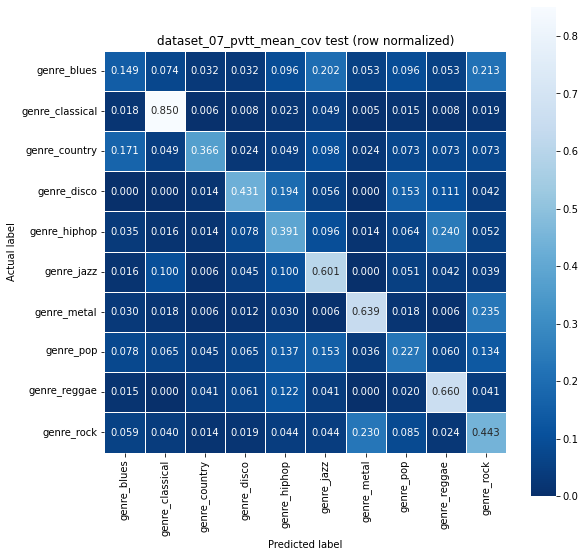



Dataset: ../../../datasets/dataset_08_pvtt_mean_icov.pickle

Train: train_accuracy = 0.614110

                 precision    recall  f1-score   support

    genre_blues     0.4126    0.7193    0.5244       374
genre_classical     0.8945    0.8398    0.8663      4221
  genre_country     0.3931    0.8318    0.5339       327
    genre_disco     0.3268    0.9273    0.4833       289
   genre_hiphop     0.5774    0.5397    0.5579      1701
     genre_jazz     0.4203    0.7349    0.5347      1241
    genre_metal     0.4324    0.8947    0.5830       665
      genre_pop     0.7572    0.3117    0.4416      4274
   genre_reggae     0.4540    0.8198    0.5844       788
     genre_rock     0.6573    0.5413    0.5937      3200

       accuracy                         0.6141     17080
      macro avg     0.5326    0.7160    0.5703     17080
   weighted avg     0.6816    0.6141    0.6098     17080

Test: test_accuracy = 0.501756

                 precision    recall  f1-score   support

    genre_bl

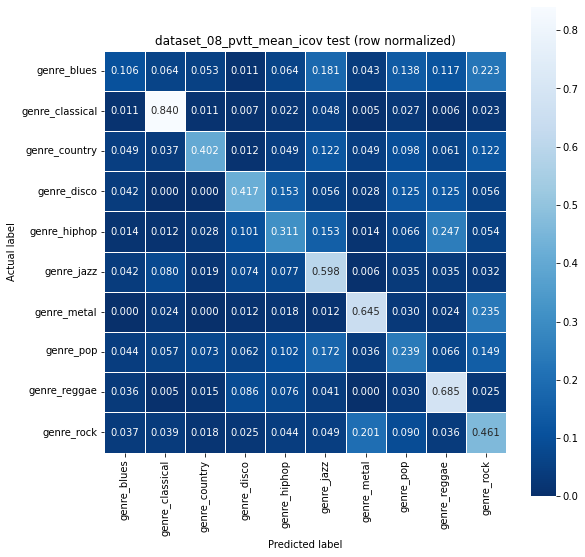



Dataset: ../../../datasets/dataset_09_pvtt_mean_cov_icov.pickle

Train: train_accuracy = 0.646253

                 precision    recall  f1-score   support

    genre_blues     0.4068    0.7701    0.5323       374
genre_classical     0.8983    0.8479    0.8724      4221
  genre_country     0.4401    0.8196    0.5726       327
    genre_disco     0.3551    0.9204    0.5125       289
   genre_hiphop     0.5928    0.6743    0.6309      1701
     genre_jazz     0.4799    0.7599    0.5883      1241
    genre_metal     0.4574    0.9128    0.6094       665
      genre_pop     0.7618    0.3479    0.4777      4274
   genre_reggae     0.5300    0.8642    0.6570       788
     genre_rock     0.6906    0.5537    0.6146      3200

       accuracy                         0.6463     17080
      macro avg     0.5613    0.7471    0.6068     17080
   weighted avg     0.7015    0.6463    0.6412     17080

Test: test_accuracy = 0.519316

                 precision    recall  f1-score   support

    genr

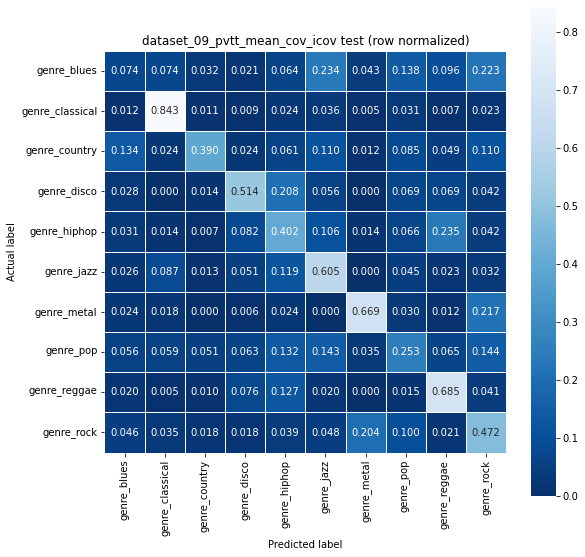

In [3]:
dataset_folder = "../../../datasets/"
datasets = sorted([name for name in glob.glob(dataset_folder + "*.pickle")])
for dataset in datasets:
    rfcross_gradient_boost_experiment(dataset)